**Inclass: Convolutional Neural Network**
- Course Length: 3 hours

<img src="assets/logo.png" width="150">
<br>

___

## Training Objective

The objective of this course is to provide participants with a comprehensive introduction to understanding deep learning model building for image data using Python. We will learn techniques on how to process image data to obtain a deep learning model. Syllabus includes:

- **Convolutional Neural Networks:**
    + Convolution concept: kernel convolutinals, strides, padding, and filter
    + Convolutional Neural Network Architecture


___

# Libraries

In [1]:
# saving model log
import datetime
import json

# data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# modeling
import numpy as np
import pandas as pd 
import tensorflow as tf
import tensorflow.keras as keras
from keras.utils.np_utils import to_categorical

# set data type of tensors to float
tf.keras.backend.set_floatx('float64')

# set seed
import random
random.seed(123)
np.random.seed(123)
tf.random.set_seed(123)

# Convolutional Neural Network

Convolutional Neural Network saat ini merupakan arsitektur standar untuk menangani **data gambar**.

## Convolution Concepts

Pada modul sebelumnya, kita telah belajar untuk mengklasifikasikan citra tangan-digit ke dalam kelas-kelasnya. Tapi ada masalah:

* Menggunakan dense layer, jumlah parameter yang akan dilatih sangat banyak.
* Terlalu banyak piksel yang tidak relevan digunakan sebagai input

Bagaimana jika kita dapat mengekstrak nilai yang relevan saja dan menghapus semua piksel yang tidak relevan? Dengan begitu jaringan kita akan memiliki fitur yang jauh lebih ringan namun dengan informasi yang relatif sama (atau bahkan lebih baik). Ini adalah saat konvolusi mengambil bagian. Silakan lihat arsitektur jaringan saraf convolutional di bawah ini:

![](https://drive.google.com/uc?export=view&id=1B753UW04KdjePCDbTdGr3JeVu01Cmbs4)

Berdasarkan ilustrasi, ada empat lapisan yang berbeda:

1. **Convolutional layer** untuk mengekstrak fitur penting dari data sebelum dimasukkan ke dalam dense layer. Data yang berbelit-belit mungkin berukuran **lebih kecil** tetapi **lebih kaya** informasi, sehingga menghasilkan pekerjaan yang lebih efektif untuk dense layer.

2. **Pooling layer** mengurangi ukuran gambar, hanya mempertahankan piksel yang relevan

3. **Flattening layer** mengonversi data gambar dua dimensi menjadi satu dimensi

4. **Fully-connected (dense) layer**, jaringan saraf dasar untuk klasifikasi

___

### 1. Convolutional Layer

- Sebuah konvolusi akan **mengekstraksi informasi yang penting** dari data menggunakan **filter**. Filter ini berfungsi seperti filter apa pun di dunia nyata, ia memiliki penggunaan khusus dan memiliki kepekaan terhadap cara yang sangat spesifik. 

- Misalnya, pikirkan filter UV untuk lensa kamera. Ini akan memblokir sinar UV untuk mengurangi warna biru yang berlebihan dari langit. Semakin banyak sinar UV di lapangan, semakin aktif filter ini untuk memberi tahu Anda bahwa ada lampu UV.
![](assets/convolution.gif)

- Secara matematis, proses feedforward dari jaringan saraf convolutional disebut **"cross correlation"**. Istilah konvolusi berasal dari fungsi turunannya ketika jaringan melakukan backpropagation. Di bawah ini adalah ilustrasi dan rumus matematika tentang bagaimana jaringan melakukan feedforward
$$ F \circ I (x,y) = \sum_{j=-N}^{N} \sum_{i=-N}^{N} F(i,j) \times I(x+i, y+j)$$

![convolutional](assets/conv-hackernoon.gif)

> Penjelasan tentang Image Filtering bisa dilihat di [Google Slides](https://docs.google.com/presentation/d/1iLfLsOKIcINLQKDTOHzyebo0gb2LP1Synr5p2f60lSQ/edit#slide=id.g115c109ac13_0_47)

Contoh penggunaan layer convolution menggunakan `keras`:

In [9]:
# Create a single layer of convolution

my_conv_layer = keras.layers.Conv2D(
    input_shape=(28,28,1), # (height, width, channel) of MNIST digit dataset  , grayscale = 1
    filters=5, # jumlah filter/kernel yang digunakan
    kernel_size=3, # ukuran dari filter
    strides=1, # steps of convolution
    padding='same', # DENGAN padding, jadi ukuran output SAMA dengan ukuran input
    activation='relu', # activation function
)

Parameters ([Documentation of `Conv2D`](https://keras.io/api/layers/convolution_layers/convolution2d/)):

- `input_shape`: 
    + ukuran gambar input dalam format `(height, width, channel)`
- `filters`: 
    + berapa jumlah filter yang akan digunakan untuk menggulung (*convolve*) gambar
    + Semakin banyak filter, semakin besar kemungkinan untuk mempelajari fitur yang lebih spesifik
    + Jumlah ini setara dengan jumlah neuron dalam lapisan padat (`unit`)
- `kernel_size`: 
    + ukuran untuk setiap filter
    + Ukuran yang lebih besar akan menangkap lebih banyak informasi dan kemungkinan besar menggeneralisasi lebih baik daripada yang lebih kecil. 
    + Tetapi penelitian menunjukkan bahwa **ukuran kernel 3 dan 5** sangat kuat dalam hal kompleksitas algoritme. Tidak ada standar yang ketat dalam menentukan ukuran kernel.
    + Praktik terbaik adalah **menggunakan nilai ganjil kecil**. 
- `strides`: 
    + Besar langkah dalam memindahkan filter selama proses konvolusi
    + Langkah yang besar akan membuat langkah lebih besar dan membuat filter berpotensi melewatkan beberapa piksel yang berarti.
- `padding`:
    + ditambahkan jika kita ingin ukuran output sama dengan input dengan melakukan beberapa padding sesuai dengan ukuran filter.
        - `'valid'`: tanpa padding atau ukuran output tidak sama dengan input
        - `'same'`: menggunakan zero-padding pada batas gambar
- `activation`: fungsi aktivasi yang akan digunakan setelah input digabungkan
    
Di bawah ini adalah ilustrasi untuk `padding='same'` pada input 6x6:

![](assets/zero-padding.png)

Untuk melihat cara kerja convolutional layer, mari load dataset digit MNIST (dari file numpy zip `.npz`)

In [3]:
# Load the data
with np.load('data_input/mnist.npz') as data:
    x_train = data['x_train']
    y_train = data['y_train']
    x_test = data['x_test']
    y_test = data['y_test']
    
# Check type and shape
print('Data Type \t: ', type(x_train), type(y_train))
print('Train size \t: ', x_train.shape, y_train.shape)
print('Test size \t: ', x_test.shape, y_test.shape)

Data Type 	:  <class 'numpy.ndarray'> <class 'numpy.ndarray'>
Train size 	:  (60000, 28, 28) (60000,)
Test size 	:  (10000, 28, 28) (10000,)


Visualisasikan gambar pertama dari data `x_train`:

Label: 5


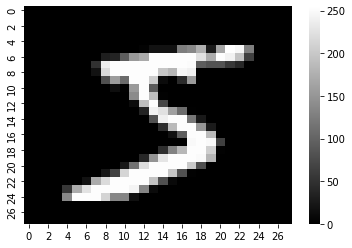

In [4]:
# visualize first image
sns.heatmap(x_train[0], cmap='gray')
print('Label:', y_train[0])


Mari kita ambil gambar pertama, bentuk ulang, dan ubah menjadi float.

💡 Pastikan bentuk input dalam konvensi berikut:

`(NUM_IMAGES, HEIGHT, WIDTH, CHANNEL_NUM)`

In [12]:
x_train[0].shape

(28, 28)

In [14]:
# reshape
input_image = x_train[0].reshape(1, 28, 28, 1).astype('float')
input_image.shape

(1, 28, 28, 1)

In [10]:
# feedforward sample_image through my_conv_layer
output_conv = my_conv_layer(input_image)
output_conv.shape

TensorShape([1, 28, 28, 5])

#### 🔎 Knowledge Check: Convolution Output

❓ Coba tebak dimensi `output_conv` setelah diconvolving menggunakan `my_conv_layer`?

> Answer: `TensorShape([1, 28, 28, 5])`

Berikut adalah ilustrasi tentang bagaimana **filter pertama (dari lima)** akan terlihat setelah gambar di-feedforward:

<AxesSubplot:>

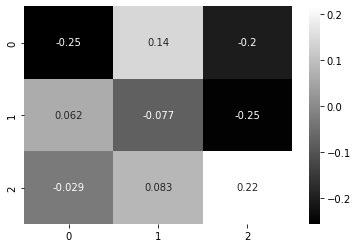

In [11]:
# take the first filter and visualize
first_filter = my_conv_layer.weights[0][:, :, 0, 0] # weights[0] refers to filter, weights[1] refers to bias
sns.heatmap(first_filter, annot=True, cmap='gray')

<AxesSubplot:>

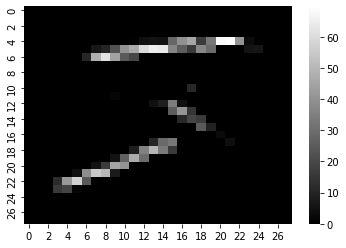

In [13]:
first_filter_output = output_conv[0, :, :, 0]
sns.heatmap(first_filter_output, cmap='gray')

Dari gambar yang dihasilkan, kita sebenarnya dapat melihat objek representasi tentang apa yang sebenarnya dipelajari oleh filter.

> Visualisasi interaktif CNN pada pengklasifikasi digit MNIST: https://www.cs.ryerson.ca/~aharley/vis/conv/flat.html

### 2. Pooling Layer

Ide dari pooling adalah untuk **meringkas dan menyederhanakan** fitur yang convolved dengan melakukan agregasi pada fitur yang convolved. Ingat bahwa kami ingin dense layer diberi dengan fitur kecil namun bermakna. 

Di bawah ini adalah contoh dari Max Pooling di mana fitur berbelit-belit diringkas menjadi data 2x2.

![](assets/maxpool_animation.gif)

In [20]:
# Create a single layer of pooling

my_pool_layer = keras.layers.MaxPooling2D(
    pool_size=2, # size of pooling
    strides=3, # steps of pooling
    padding='valid' # WITHOUT padding
)

Parameters ([Documentation of `MaxPooling2D`](https://keras.io/api/layers/pooling_layers/max_pooling2d/):

- `pool_size` ekuivalen dengan `kernel_size` pada `Conv2D` yang akan menentukan seberapa besar kolam Anda
- `strides` dan `padding` sama seperti pada `Conv2D`

> Selain MaxPooling, ada beberapa fungsi bawaan untuk membantu Anda mengurangi fitur tersebut. Mengunjungi [Documentation on Pooling Layers](https://keras.io/api/layers/pooling_layers/)

#### 🔎 Knowledge Check: Pooling Output

Untuk melihat cara kerja pooling layer, kita dapat memasukkan input acak ke dalamnya.

`1, 28, 28, 5`: ada 1 gambar, ukuran 28 x 28, sebanyak 5 channel (filter)

In [21]:
# input for pooling layer (generate random values)
input_pooling = tf.random.normal((1, 28, 28, 5)) # try to change the shape here
print("INPUT POOLING SHAPE:", input_pooling.shape)

# output for pooling layer
output_pooling = my_pool_layer(input_pooling)
print("OUTPUT POOLING SHAPE:", output_pooling.shape)

INPUT POOLING SHAPE: (1, 28, 28, 5)
OUTPUT POOLING SHAPE: (1, 9, 9, 5)


❓Cobalah bereksperimen pada nilai-nilai berikut dengan membuat beberapa perubahan padanya.

1. Jika kita mengubah bentuk variabel `input_pooling`, maka hanya mengubah dimensi ke-2 dan ke-3 saja (tinggi dan lebar gambar)

2. Jika parameter `pool_size` diperbesar, maka dimensi gambar semakin kecil

3. Jika parameter `strides` dinaikkan, maka dimensi gambar semakin kecil

___

## Implement CNN in Keras

### Load Image Data

Pada bagian ini kami akan mengimplementasikan CNN pada kasus klasifikasi digit MNIST. Tapi pertama-tama, siapkan data Anda dengan membaca kembali dataset MNIST.

In [11]:
# Load the data
with np.load('data_input/mnist.npz') as data:
    x_train = data['x_train']
    y_train = data['y_train']
    x_test = data['x_test']
    y_test = data['y_test']
    
# Check type and shape
print('Data Type \t: ', type(x_train), type(y_train))
print('Train size \t: ', x_train.shape, y_train.shape)
print('Test size \t: ', x_test.shape, y_test.shape)

Data Type 	:  <class 'numpy.ndarray'> <class 'numpy.ndarray'>
Train size 	:  (60000, 28, 28) (60000,)
Test size 	:  (10000, 28, 28) (10000,)


### Data Preparation

1. **Reshaping**: Secara default, model CNN menerima data input dalam `NUM_IMAGES, HEIGHT, WIDTH, CHANNEL`
2. **Scaling / Rescaling**: Mengubah setiap nilai piksel dari rentang [0,255] ke [0,1]. Ini membuat konvergensi lebih cepat saat proses training.
3. `to_categorical` (opsional, tidak wajib): Untuk melakukan one hot encoding pada label target

In [12]:
# Reshaping
x_train = x_train.reshape(-1, 28, 28, 1) # (60000, 28, 28, 1)
x_test = x_test.reshape(-1, 28, 28, 1) # (10000, 28, 28, 1)

# Rescaling
x_train_new = x_train / 255.0
x_test_new = x_test / 255.0

# One-hot encode integer (for target)
y_train_new = to_categorical(y_train)
y_test_new = to_categorical(y_test)

In [13]:
# illustration of to_categorical
to_categorical([1, 2, 2, 3, 5])

array([[0., 1., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 0., 1.]], dtype=float32)

### 🏄‍ Dive Deeper: Create CNN Model

![](assets/dive-deeper-cnn.jpeg)

Di bawah ini kami menyediakan potongan kode arsitektur dan mengkompilasi model CNN. Lengkapi kode untuk membuat network seperti yang terlihat dari visualisasi di atas.

Jangan ragu untuk mendiskusikan dan menentukan n1, n2, n3. Panduan untuk kompilasi model:

- `optimizer`: Gunakan pengoptimal apa pun yang ingin Anda gunakan. Ingat, Anda juga dapat bereksperimen dengan kecepatan belajar.
- `loss`: Pilih fungsi kerugian yang sesuai. Ingat, ini adalah klasifikasi multikelas dengan target **one-hot encoded**.
- `metrics`: Pilih metrik evaluasi yang sesuai.

In [14]:
# DEFINE ARCHITECTURE
model_cnn = keras.models.Sequential([
    # input layer
    keras.layers.InputLayer(input_shape=(___, ___, ___)),

    # first convolutional layer
    keras.layers.Conv2D(filters=___, kernel_size=___, strides=___, padding='___', activation='___'),

    # first pooling layer
    keras.layers.MaxPooling2D(pool_size=___, strides=___, padding='___'),

    # second convolutional layer
    keras.layers.Conv2D(filters=___, kernel_size=___, strides=___, padding='___', activation='___'),

    # second pooling layer
    keras.layers.MaxPooling2D(pool_size=___, strides=___, padding='___'),

    # flattening layer
    ______,

    # fully-connected layer
    keras.layers.Dense(units=___, activation='___'),
    keras.layers.Dropout(rate=0.2),
    keras.layers.Dense(units=___, activation='___')
    ])
    
# COMPILE MODEL
model_cnn.compile(optimizer='___', loss='___', metrics=['___'])

In [ ]:
# Fit your model (for now it's okay to use epochs=1 because the model fitting time will be quite long)
model_cnn.fit(___)

> Additional: If you are curious how the number of parameters (Param #) is calculated, [read this article](https://towardsdatascience.com/how-to-calculate-the-number-of-parameters-in-keras-models-710683dae0ca)

In [17]:
# evaluate your model on test data
model_cnn.evaluate(___, ___)

313/313 [==============================] - 4s 11ms/step - loss: 0.0632 - accuracy: 0.9800


[0.06322033366439864, 0.98]

## (Additional) Data Augmentation

Convolutional neural network bekerja dengan baik pada data gambar. Namun, performanya tetap mengandalkan **kualitas data**. Dalam beberapa kasus, kami **tidak memiliki cukup data** untuk memulai. Memaksa model untuk berlatih pada dataset kecil akan sangat meningkatkan kemungkinan overfit.

Untuk mengurangi dampak overfitting, sebelumnya kita belajar mengontrol fungsi regularization dan dropout yang hanya terfokus pada model. Di bagian ini kita akan mengubah perspektif kita terhadap dataset itu sendiri dan melakukan beberapa augmentasi untuk menambah variasi data dan **mengurangi overfitting**. Data gambar bekerja dengan baik dengan augmentasi karena tidak akan banyak mengubah informasi.

Ada berbagai cara untuk menambah gambar, tetapi di bawah ini adalah yang paling umum:

![](assets/cat-augmentation.png)

Semua metode augmentasi tersebut tersedia di bawah Kelas `keras.preprocessing.image.ImageDataGenerator`. Tidak hanya itu, ImageDataGenerator juga menyediakan beberapa fungsi untuk **preprocess** data kita seperti rescaling atau bahkan fungsi kustom preprocessing. Jalankan kode di bawah ini untuk membuat objek generator.

> Documentation: https://www.tensorflow.org/api_docs/python/tf/keras/preprocessing/image/ImageDataGenerator

In [18]:
train_generator = keras.preprocessing.image.ImageDataGenerator(
    rescale=1./255,
    rotation_range=5, # Degree range for random rotations (Integer)
    width_shift_range=0.05, # Randomly shift images horizontally (fraction of total width)
    height_shift_range=0.05, # Randomly shift images vertically (fraction of total height)
    zoom_range=0.05, # Randomly zoom in or zoom out image
    horizontal_flip=False, # If True, randomly flip images horizontally
    vertical_flip=False, # If True, randomly flip images vertically
    validation_split=0.2) # Fraction of data as validation data

test_generator = keras.preprocessing.image.ImageDataGenerator(rescale=1./255)

> 💡 Catatan penting mengenai augmentasi data:
> - Harap diingat bahwa menambahkan lebih banyak proses augmentasi akan **membebani waktu pelatihan**.
> - Beberapa data juga mungkin memiliki beberapa ketidaksesuaian dengan proses augmentasi. Misalnya, flip vertikal tidak diperlukan untuk klasifikasi mobil karena kita tidak pernah melihat mobil berjalan dari atas ke bawah. Jadi **buat augmentasi Anda dengan bijak**.
> - Hanya menambah set data pelatihan Anda. **Set data pengujian Anda tidak boleh ditambah**, karena kami ingin mengevaluasi model kami pada data yang tidak terlihat.

`ImageDataGenerator` bekerja seperti pipeline pipeline, mengerjakan apa pun yang kami nyatakan di dalamnya. Jadi kita masih perlu melampirkan data ke dalamnya. Di bawah ini adalah ilustrasi pipeline dan cara melampirkan data ke generator dalam kode.

![](assets/keras-augmentation.png)

> 🔻Informasi tambahan: Jika data Anda sudah berada di dalam direktori, Anda dapat menggunakan metode `flow_from_directory` untuk menyelesaikan pipeline. Karena kita berurusan dengan data numpy, maka kita menggunakan `flow` sebagai gantinya.

In [19]:
# Complete the generator by specifying the incoming data into it
# note: we are using x_train because the rescaling is included inside ImageDataGenerator
train_data = train_generator.flow(x_train, y_train_new, subset="training")
val_data = train_generator.flow(x_train, y_train_new, subset="validation")
test_data = test_generator.flow(x_test, y_test_new)

**Model Training** 

Setelah pipeline augmentasi dan preprocessing selesai, kita bisa memasukkannya ke dalam model kita untuk melakukan pelatihan.

In [20]:
# Buat model baru dengan arsitektur yang sama dengan sebelumnya

# DEFINE ARCHITECTURE
model_cnn_augment = keras.models.Sequential([
    # input layer
    keras.layers.InputLayer(input_shape=(28, 28, 1)),

    # first convolutional layer
    keras.layers.Conv2D(filters=32, kernel_size=5, strides=1, padding='valid', activation='relu'),

    # first pooling layer
    keras.layers.MaxPooling2D(pool_size=2, strides=2, padding='valid'),

    # second convolutional layer
    keras.layers.Conv2D(filters=16, kernel_size=5, strides=1, padding='valid', activation='relu'),

    # second pooling layer
    keras.layers.MaxPooling2D(pool_size=2, strides=2, padding='valid'),

    # flattening layer
    keras.layers.Flatten(),

    # fully-connected layer
    keras.layers.Dense(units=64, activation='relu'),
    keras.layers.Dropout(rate=0.2),
    keras.layers.Dense(units=10, activation='softmax')
    ])
    
# COMPILE MODEL
model_cnn_augment.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

model_cnn_augment.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 24, 24, 32)        832       
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 12, 12, 32)       0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 8, 8, 16)          12816     
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 4, 4, 16)         0         
 2D)                                                             
                                                                 
 flatten_1 (Flatten)         (None, 256)               0         
                                                                 
 dense_2 (Dense)             (None, 64)               

> 💡 Important note: Saat menggunakan augmentasi data, kami mendefinisikan parameter `validation_split` pada `ImageDataGenerator` bukan selama pemasangan model `.fit()`. Sebagai gantinya, kami mendefinisikan parameter `validation_data`.

In [22]:
# Train the model with train generator, alongside with test generator as validation data
model_cnn_augment.fit(x=train_data, 
                      epochs=3, validation_data=val_data)

Epoch 1/3
1500/1500 [==============================] - 61s 40ms/step - loss: 0.2909 - accuracy: 0.9089 - val_loss: 0.0942 - val_accuracy: 0.9698
Epoch 2/3
1500/1500 [==============================] - 62s 42ms/step - loss: 0.1064 - accuracy: 0.9672 - val_loss: 0.0712 - val_accuracy: 0.9782
Epoch 3/3
1500/1500 [==============================] - 61s 40ms/step - loss: 0.0796 - accuracy: 0.9755 - val_loss: 0.0779 - val_accuracy: 0.9770


In [23]:
# Evaluate model on test data
model_cnn_augment.evaluate(test_data)

313/313 [==============================] - 3s 9ms/step - loss: 0.0363 - accuracy: 0.9878


[0.03631873135762289, 0.9878]

# 📝 Summary


- Gambar direpresentasikan dalam bentuk **matrix pixel** dengan range nilai 0 sampai 255. Dimensi data gambar meliputi: (NUM_IMAGES, HEIGHT, WIDTH, CHANNEL_NUM)


* Convolutional Neural Network:
    - Baik untuk kasus data gambar (walaupun pada implementasinya bisa untuk data selain gambar)
    - Untuk image classification, biasanya terdiri dari 4 layer:
        1. Convolutional
            - Hyperparameter: `filters`, `kernel_size`, `strides`
        2. Pooling
            - Hyperparameter: `pool_size`, `strides`
        3. Flatenning
        4. Dense

* Workflow:
    1. Load data image
    2. Data preparation, misalnya: reshaping, rescaling, encoding
    3. Data augmentation (opsional): solusi untuk memperbanyak variasi gambar untuk mencegah overfitting
    4. Definisi arsitektur model
    5. Compile model
    6. Fitting model
    7. Evaluation model
    